In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import csv

In [3]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',None)
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [5]:
input_file_path = 'bank-full.csv'
output_file_path = 'cleaned-data.csv'
dataframe = pd.read_csv(input_file_path, delimiter=';')

# Use LabelEncoder to convert categorical variables to numerical values
label_encoder = LabelEncoder()

# Apply LabelEncoder to categorical columns
categorical_columns = ["age","job","marital","education","default","balance","housing","loan","contact","day","month","duration","campaign","pdays","previous","poutcome","y"]
for column in categorical_columns:
    dataframe[column] = label_encoder.fit_transform(dataframe[column])

# Select relevant columns for the output
selected_columns = ["age","job","marital","education","default","balance","housing","loan","contact","day","month","duration","campaign","pdays","previous","poutcome","y"]

# Write the converted data to the output CSV file
dataframe[selected_columns].to_csv(output_file_path, index=False)

In [6]:
path = '/content/cleaned-data.csv'

# Load the dataframe
dataframe = pd.read_csv(path)

print('Shape of the data is: ',dataframe.shape)

dataframe.head()

Shape of the data is:  (45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,40,4,1,2,0,3036,1,0,2,4,8,261,0,0,0,3,0
1,26,9,2,1,0,945,1,0,2,4,8,151,0,0,0,3,0
2,15,2,1,1,0,918,1,1,2,4,8,76,0,0,0,3,0
3,29,1,1,3,0,2420,1,0,2,4,8,92,0,0,0,3,0
4,15,11,2,3,0,917,0,0,2,4,8,198,0,0,0,3,0


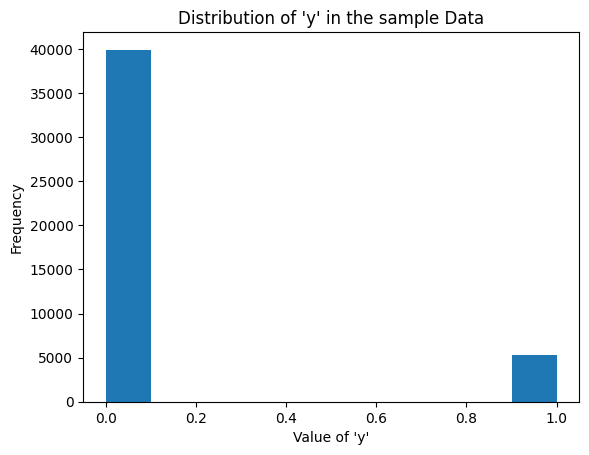

In [9]:

plt.hist(dataframe['y'])
plt.xlabel("Value of 'y'")
plt.ylabel("Frequency")
plt.title("Distribution of 'y' in the sample Data")
plt.show()

In [10]:
X = dataframe.iloc[:,:-1]

# Target
y = dataframe.iloc[:,-1]

# Dividing the data into train and test subsets
x_train,x_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
# run Logistic Regression model
model = LogisticRegression(max_iter=20000, penalty='l2')
# fitting the model
model.fit(x_train, y_train)
# predicting the values
y_scores = model.predict(x_val)

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.58      0.24      0.34      1091

    accuracy                           0.89      9043
   macro avg       0.74      0.61      0.64      9043
weighted avg       0.86      0.89      0.87      9043

ROC_AUC_SCORE is 0.6067517617160341


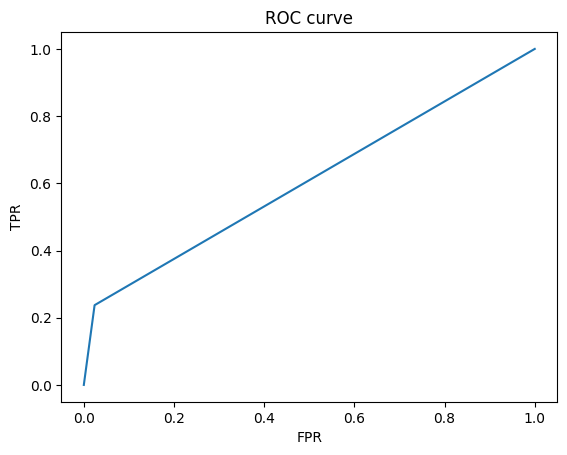

In [12]:
auc = roc_auc_score(y_val, y_scores)
print('Classification Report:')
print(classification_report(y_val,y_scores))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))

#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])

plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()